# Introduction

We tried to find the best neighborhood in Pittsburgh based on the monetary value of the neighborhoods. Our metrics were Housing Price, Tax Delinquency, Population Density, and Sales Transactions.

# Metric

I looked at the Housing Price metric. I tried to find the richest neighborhood based on housng units for sale.

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("value.csv")

This dataset contains data on housing units for sale in Pittsburgh neighborhoods. 

In [4]:
pd.set_option("display.max_columns", None)
df.head(25)

Neighborhood  Id  Estimate; Total:  Margin of Error; Total:  \
0            Allegheny Center   1              72.0                28.000000   
1              Allegheny West   2              69.0                31.000000   
2                   Allentown   3             538.0               112.769677   
3                   Arlington   4             492.0                84.433406   
4           Arlington Heights   5               0.0                10.000000   
5                  Banksville   6             985.0               139.728308   
6           Bedford Dwellings   7              48.0                31.000000   
7                   Beechview   8            2065.0               199.682248   
8                 Beltzhoover   9             556.0               129.988461   
9                  Bloomfield  10            1688.0               134.014925   
10                      Bluff  11              79.0                32.924155   
11                    Bon Air  12             305.0                62.000000   
12           Brighton Heights  13            2206.0               159.125736   
13                  Brookline  14            4245.0               300.141633   
14       California-Kirkbride  15             114.0                29.000000   
15                    Carrick  16            2624.0               215.995370   
16  Central Business District  17             397.0                98.158036   
17      Central Lawrenceville  18            1015.0               117.443603   
18          Central Northside  19             541.0                80.913534   
19            Central Oakland  20             193.0                55.578773   
20             Chartiers City  21             186.0                55.000000   
21                    Chateau  22               3.0                 3.000000   
22            Crafton Heights  23            1034.0               115.836091   
23           Crawford-Roberts  24             226.0                58.591808   
24           Duquesne Heights  25             837.0               109.635761   

    Estimate; Total: - Less than $10,000  \
0                                    0.0   
1                                    4.0   
2                                   45.0   
3                                   12.0   
4                                    0.0   
5                                   26.0   
6                                    4.0   
7                                    0.0   
8                                    4.0   
9                                    5.0   
10                                   0.0   
11                                   2.0   
12                                  14.0   
13                                  47.0   
14                                   0.0   
15                                  11.0   
16                                   0.0   
17                                   0.0   
18                                  11.0   
19                                   0.0   
20                                   0.0   
21                                   0.0   
22                                   0.0   
23                                   7.0   
24                                   7.0   

    Margin of Error; Total: - Less than $10,000  \
0                                     10.000000   
1                                      7.000000   
2                                     33.734256   
3                                     16.186414   
4                                     10.000000   
5                                     35.510562   
6                                      6.000000   
7                                     31.622777   
8                                     18.330303   
9                                     30.805844   
10                                    20.000000   
11                                     4.000000   
12                                    33.600595   
13                                    50.259327   
14                        

In [6]:
df.drop(df.columns[df.columns.str.contains("Margin of Error")], axis = 1, inplace = True)
df.drop(["Estimate; Total:", "Id"], axis = 1, inplace = True)
df

Neighborhood  Estimate; Total: - Less than $10,000  \
0      Allegheny Center                                   0.0   
1        Allegheny West                                   4.0   
2             Allentown                                  45.0   
3             Arlington                                  12.0   
4     Arlington Heights                                   0.0   
..                  ...                                   ...   
86  Upper Lawrenceville                                   0.0   
87             West End                                   0.0   
88         West Oakland                                   0.0   
89             Westwood                                  29.0   
90              Windgap                                  25.0   

    Estimate; Total: - $10,000 to $14,999  \
0                                     0.0   
1                                     0.0   
2                                    19.0   
3                                    29.0   
4                                     0.0   
..                                    ...   
86                                    0.0   
87                                    0.0   
88                                    0.0   
89                                    0.0   
90                                   36.0   

    Estimate; Total: - $15,000 to $19,999  \
0                                     0.0   
1                                     0.0   
2                                    22.0   
3                                     5.0   
4                                     0.0   
..                                    ...   
86                                   17.0   
87                                    0.0   
88                                   10.0   
89                                    0.0   
90                                    5.0   

    Estimate; Total: - $20,000 to $24,999  \
0                                     0.0   
1                                     0.0   
2                                    44.0   
3                                    43.0   
4                                     0.0   
..                                    ...   
86                                   13.0   
87                                   12.0   
88                                    0.0   
89                                    0.0   
90                                    0.0   

    Estimate; Total: - $25,000 to $29,999  \
0                                     0.0   
1                                     0.0   
2                                   100.0   
3                                    27.0   
4                                     0.0   
..                                    ...   
86                                    5.0   
87                                    0.0   
88                                    6.0   
89                                    0.0   
90                                    0.0   

    Estimate; Total: - $30,000 to $34,999  \
0                                     0.0   
1                                     0.0   
2                                    49.0   
3                                    45.0   
4                                     0.0   
..                                    ...   
86                                   23.0   
87                                    0.0   
88                                   23.0   
89                                    0.0   
90                                   18.0   

    Estimate; Total: - $35,000 to $39,999  \
0                                     0.0   
1                                     0.0   
2                                    24.0   
3                                    49.0   
4                                     0.0   
..                                    ...   
86                                   55.0   
87                                    0.0   
88                                    0.0   
89                                    9.0   
90                            

In [23]:
points_total = pd.Series(name = "hood")
for index, row in df.iterrows():
    points = row["Estimate; Total: - Less than $10,000"]
    points = 0
    print(row[1])
    Hood = row["Neighborhood"]
    for i in range(1, len(row)):
        points += (row[i] * i)
    points_total[Hood] = points
print(points_total)

0.0
4.0
45.0
12.0
0.0
26.0
4.0
0.0
4.0
5.0
0.0
2.0
14.0
47.0
0.0
11.0
0.0
0.0
11.0
0.0
0.0
0.0
0.0
7.0
7.0
8.0
0.0
0.0
0.0
0.0
0.0
7.0
3.0
0.0
54.0
0.0
22.0
0.0
19.0
0.0
15.0
27.0
14.0
12.0
4.0
0.0
20.0
16.0
6.0
11.0
0.0
34.0
4.0
27.0
0.0
2.0
17.0
0.0
0.0
8.0
3.0
18.0
19.0
14.0
0.0
0.0
0.0
0.0
0.0
6.0
0.0
0.0
8.0
31.0
4.0
15.0
11.0
36.0
0.0
11.0
0.0
5.0
9.0
3.0
20.0
0.0
0.0
0.0
0.0
29.0
25.0
Allegheny Center        1163.0
Allegheny West          1251.0
Allentown               3542.0
Arlington               3798.0
Arlington Heights          0.0
                        ...   
Upper Lawrenceville     6461.0
West End                 359.0
West Oakland            2157.0
Westwood               12715.0
Windgap                 5596.0
Name: hood, Length: 91, dtype: float64


/scratch/slurm-12464/ipykernel_109829/2524296134.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(row[1])
/scratch/slurm-12464/ipykernel_109829/2524296134.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  points += (row[i] * i)
/scratch/slurm-12464/ipykernel_109829/2524296134.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(row[1])
/scratch/slurm-12464/ipykernel_109829/2524296134.py:8: FutureWarning: Series.__get

In [24]:
points_total.sort_values(ascending=False)

Squirrel Hill South    57640.0
Brookline              51883.0
Squirrel Hill North    39686.0
Shadyside              36259.0
Point Breeze           30403.0
                        ...   
Chateau                   66.0
Arlington Heights          0.0
North Shore                0.0
Glen Hazel                 0.0
South Shore                0.0
Name: hood, Length: 91, dtype: float64

This shows that Squirrel Hill South has the most monetary value. 

In [21]:
neighborhoods = gpd.read_file("Neighborhoods_.shp")

In [30]:
house_map = neighborhoods.merge(points_total, how='left', left_on='hood', right_index=True)
house_map

objectid  fid_blockg statefp10 countyfp10 tractce10 blkgrpce10  \
0          1         0.0        42        003    040500          1   
1          2         1.0        42        003    040400          1   
2          3         2.0        42        003    040200          2   
3          4         3.0        42        003    030500          2   
4          5         5.0        42        003    020300          1   
..       ...         ...       ...        ...       ...        ...   
85        88       298.0        42        003    563100          3   
86        89        32.0        42        003    562600          1   
87        90        57.0        42        003    250700          1   
88        91        96.0        42        003    562300          2   
89      1292         NaN      None       None      None       None   

         geoid10     namelsad10 mtfcc10 funcstat10    aland10  awater10  \
0   420030405001  Block Group 1   G5030          S   268195.0       0.0   
1   420030404001  Block Group 1   G5030          S    75472.0       0.0   
2   420030402002  Block Group 2   G5030          S   282679.0       0.0   
3   420030305002  Block Group 2   G5030          S   284548.0       0.0   
4   420030203001  Block Group 1   G5030          S  1593129.0  329216.0   
..           ...            ...     ...        ...        ...       ...   
85  420035631003  Block Group 3   G5030          S   928505.0       0.0   
86  420035626001  Block Group 1   G5030          S   512433.0       0.0   
87  420032507001  Block Group 1   G5030          S   560320.0       0.0   
88  420035623002  Block Group 2   G5030          S  1197940.0  275741.0   
89          None           None    None       None        NaN       NaN   

     intptlat10    intptlon10    shape_leng  fid_neighb        area  \
0   +40.4406805  -079.9542332   7988.379391        62.0   7843108.0   
1   +40.4458408  -079.9483932   3813.620989        40.0  13904629.0   
2   +40.4412437  -079.9626107   8260.915502        61.0   5999801.5   
3   +40.4403871  -079.9813476   8670.428122        56.0   7202139.0   
4   +40.4544996  -079.9812762  24019.532865        27.0  16947852.0   
..          ...           ...           ...         ...         ...   
85  +40.4270691  -080.0344802  16308.779748        69.0  10278895.0   
86  +40.4408830  -080.0357065  18778.991280        59.0   5579501.0   
87  +40.4599421  -080.0218657  11709.518814        28.0   6050988.0   
88  +40.4050484  -079.9308344  18931.493955        89.0  12713036.0   
89         None          None           NaN         NaN         NaN   

    perimeter  neighbor_  neighbor_i                hood_x  hood_no    acres  \
0   11526.863       63.0      2145.0       Central Oakland       20  180.883   
1   20941.387       41.0      2123.0         North Oakland       56  320.679   
2   18271.426       62.0      2144.0          West Oakland       88  138.372   
3   15696.759       57.0      2139.0      Crawford-Roberts       24  166.101   
4   23903.078       28.0      2110.0        Strip District       80  390.864   
..        ...        ...         ...                   ...      ...      ...   
85  16268.131       70.0      2152.0             Ridgemont       67  237.059   
86  18776.656       60.0      2142.0              West End       87  128.679   
87  11711.301       29.0      2111.0  California-Kirkbride       15  139.552   
88  18931.703       90.0      2172.0            Glen Hazel       36  293.197   
89        NaN        NaN         NaN           Perry North       61      NaN   

    sqmiles  dpwdiv  unique_id  sectors    shape_le_1    shape_ar_1  \
0     0.281     3.0      113.0       14  11526.863222  7.843108e+06   
1     0.499     3.0       25.0       14  20941.386025  1.390463e+07   
2     0.215     3.0       21.0       14  18271.426385  5.999801e+06   
3     0.258     3.0       19.0       15  15696.759230  7.202139e+06   
4     0.608     1.0       23.0       13  23903.077852  1.694785e+07   
..      ...     ...   

<Axes: >

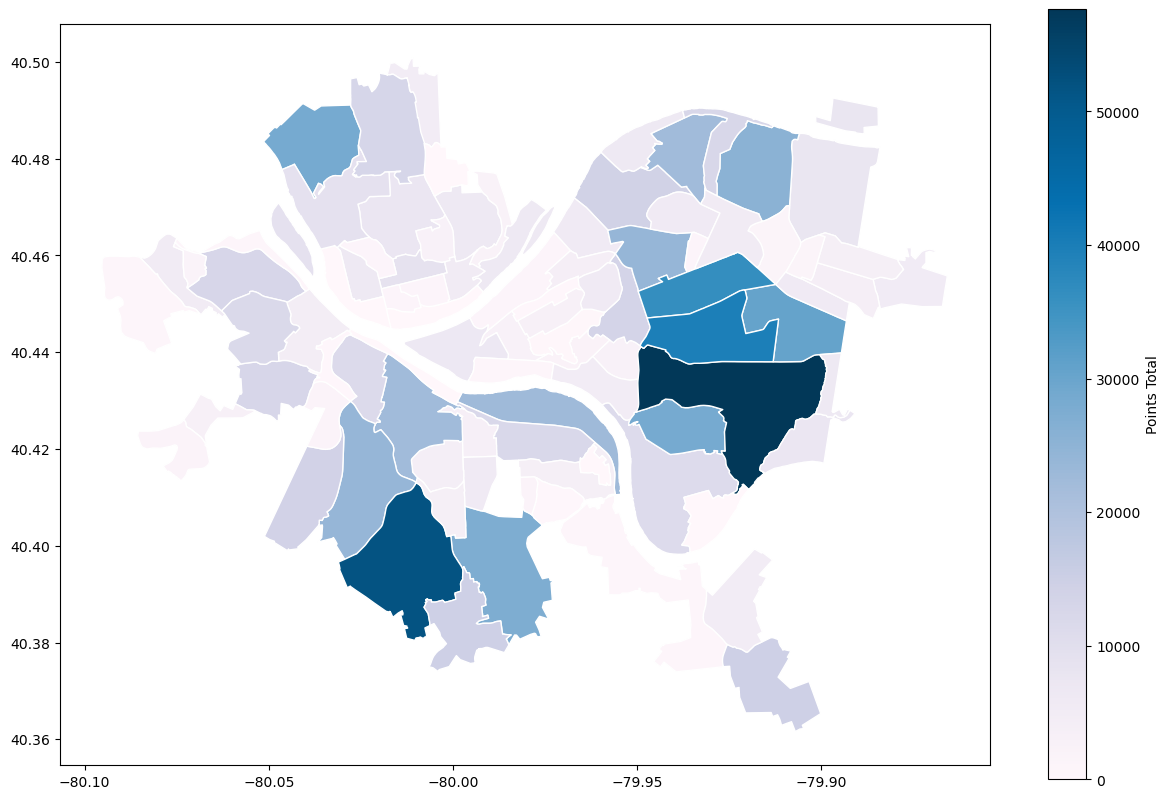

In [46]:
house_map.plot(column="hood_y", cmap = "PuBu", edgecolor = "white", legend = True, legend_kwds={'label': "Points Total"}, figsize = (15,10), missing_kwds={"color": "lightgrey"})

# The Best Neighborhood

According to this dataset, Squirrel Hill South is the best neighborhood. It has the most monetary value out of all the neighborhoods based on housing units for sale.

# Conclusion

I would say that my personal favorite neighborhood is Morningside because I grew up there. This is different from Squirrel Hill South which was the data-driven "best neighborhood." I think both neighborhoods are nice areas and offer good things for their respective residents. I understand why Morningside didn't win since my metric was richest neighborhood based off of housing units, and Morningside doesn't have the same prices for housing compared to Squirrel Hill.